<a href="https://colab.research.google.com/github/rohanriku/ML-DL/blob/master/linear_regression_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

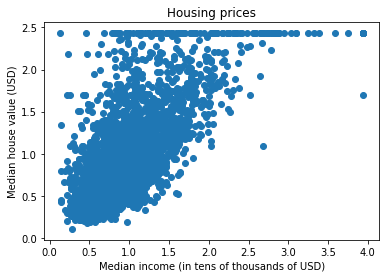

0.08211612569808081


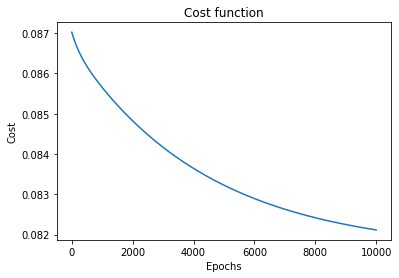

0.08369394222109242


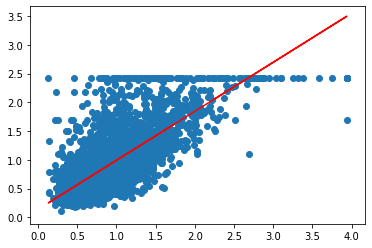

(17000, 2)
(17000, 1)
(3000, 2)


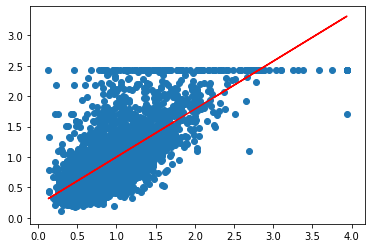

[[0.         0.78784161]]
0.1400890156719664 0.8517352642188034


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D as ax

theta0 = 0
theta1 = 1
theta0_history = list()
theta1_history = list()


def hypothesis(x):
  return theta0 + np.multiply(theta1, x)

def cost(x, y):
  return (1/(2 * len(x))) * np.sum(np.square((hypothesis(x) - y)))

def gradient_descent(x, y, alpha):
  temp0 = (1/len(x)) * np.sum(hypothesis(x) - y) 
  temp1 = (1/len(x)) * np.sum(np.multiply((hypothesis(x) - y), x))
  global theta0
  global theta1
  theta0 = theta0 - alpha * temp0
  theta1 = theta1 - alpha * temp1
  theta0_history.append(theta0)
  theta1_history.append(theta1) 

train_set = pd.read_csv('sample_data/california_housing_train.csv')

test_set = pd.read_csv('sample_data/california_housing_test.csv')


train_set.median_house_value = train_set.median_house_value / np.mean(train_set.median_house_value)
test_set.median_house_value = test_set.median_house_value / np.mean(test_set.median_house_value)

train_set.median_income = train_set.median_income / np.mean(train_set.median_income)
test_set.median_income  = test_set.median_income / np.mean(test_set.median_income)

plt.scatter(test_set.median_income,test_set.median_house_value)
plt.title('Housing prices')
plt.ylabel('Median house value (USD)')
plt.xlabel('Median income (in tens of thousands of USD)')
plt.show()
cost_history = list()

epochs = list()
for epoch in range(0, 10000):
  gradient_descent(train_set.median_income, train_set.median_house_value, 0.001)
  cost_history.append(cost(train_set.median_income, train_set.median_house_value))
  epochs.append(epoch)

print(cost_history[-1])
plt.plot(epochs, cost_history)
plt.title('Cost function')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()




print(cost(test_set.median_income, test_set.median_house_value))
predictions = hypothesis(test_set.median_income)
plt.plot(test_set.median_income, predictions, color='r')
plt.scatter(test_set.median_income, test_set.median_house_value)
plt.show()


reg = LinearRegression()
ones=np.ones((len(train_set),1))

train_x = np.array(train_set.median_income)
train_x = train_x.reshape(-1,1)
train_x = np.append(ones,train_x,axis=1)

train_y = np.array(train_set.median_house_value)
train_y = train_y.reshape(-1,1)
ones=np.ones((len(test_set),1))
test_x = np.array(test_set.median_income)
test_x = test_x.reshape(-1, 1)
test_x = np.append(ones,test_x,axis=1)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

reg.fit(train_x, train_y)
predict_y = reg.predict(test_x)

plt.plot(test_set.median_income, predict_y, color='r')
plt.scatter(test_set.median_income, test_set.median_house_value)
plt.show()

print(reg.coef_)
print(theta0, theta1)

